# Chapter 7

In [1]:
import tensorflow as tf
from tensorflow.contrib import learn

### Linear Regression For the Boston Housing dataset

In [2]:
from sklearn import datasets, metrics, preprocessing
boston = datasets.load_boston()
x_data = preprocessing.StandardScaler().fit_transform(boston.data)
y_data = boston.target

#### Native TensorFlow

In [3]:
x = tf.placeholder(tf.float64,shape=(None,13))
y_true = tf.placeholder(tf.float64,shape=(None))

with tf.name_scope('inference') as scope:
    w = tf.Variable(tf.zeros([1,13],dtype=tf.float64,name='weights'))
    b = tf.Variable(0,dtype=tf.float64,name='bias')
    y_pred = tf.matmul(w,tf.transpose(x)) + b

with tf.name_scope('loss') as scope:
    loss = tf.reduce_mean(tf.square(y_true-y_pred))

with tf.name_scope('train') as scope:
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)      
    for step in range(200):
        sess.run(train,{x: x_data, y_true: y_data})
        
    MSE = sess.run(loss,{x: x_data, y_true: y_data})
print(MSE)

21.902138121879428


### contirb.learn

In [4]:
NUM_STEPS = 200
MINIBATCH_SIZE = 506

feature_columns = learn.infer_real_valued_columns_from_input(x_data)

reg = learn.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=tf.train.GradientDescentOptimizer(
      learning_rate=0.1)
      )

reg.fit(x_data, boston.target, steps=NUM_STEPS, 
        batch_size=MINIBATCH_SIZE)

MSE = reg.evaluate(x_data, boston.target, steps=1)

print(MSE)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f191d2caf60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-08-21-20:36:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp22pi0_0i/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-08-21-20:36:42
INFO:tensorflow:Saving dict for global step 200: global_step = 200, loss = 21.902138
{'loss': 21.902138, 'global_step': 200}


### MNIST with contrib.learn DNN classifier

In [5]:
import sys
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
DATA_DIR = '/tmp/data' if not 'win32' in sys.platform else "c:\\tmp\\data"
data = input_data.read_data_sets(DATA_DIR, one_hot=False)
x_data, y_data = data.train.images,data.train.labels.astype(np.int32)
x_test, y_test = data.test.images,data.test.labels.astype(np.int32)


NUM_STEPS = 2000
MINIBATCH_SIZE = 128

feature_columns = learn.infer_real_valued_columns_from_input(x_data)

dnn = learn.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[200],
    n_classes=10,
    optimizer=tf.train.ProximalAdagradOptimizer(
    learning_rate=0.2)
    )

dnn.fit(x=x_data,y=y_data, steps=NUM_STEPS,
        batch_size=MINIBATCH_SIZE)

test_acc = dnn.evaluate(x=x_test,y=y_test, steps=1)["accuracy"]
print('test accuracy: {}'.format(test_acc))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please switch to

### Predict and plot confusion matrix

In [6]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    plt.savefig('confusion_mat.png', bbox_inches='tight', format='png', dpi=300, pad_inches=0,transparent=True)

    
    plt.show()

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available

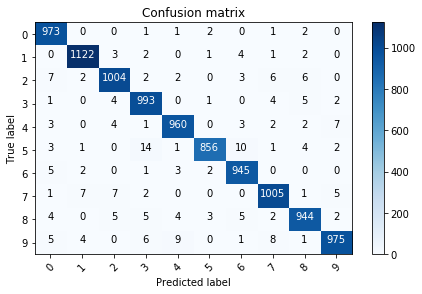

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred = dnn.predict(x=x_test,as_iterable=False)
class_names = ['0','1','2','3','4','5','6','7','8','9']    
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, class_names)

### Generate example categorical data

In [8]:
import numpy as np
import pandas as pd


### plot and create data frame

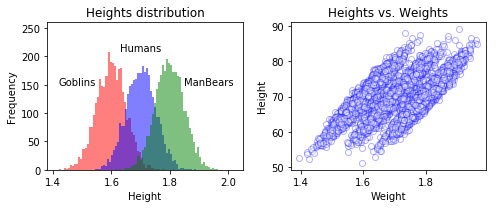

In [9]:
import matplotlib.pyplot as plt

N = 10000

weight = np.random.randn(N)*5+70
spec_id = np.random.randint(0,3,N)
bias = [0.9,1,1.1]
height = np.array([weight[i]/100 + bias[b] for i,b in enumerate(spec_id)])
spec_name = ['Goblin','Human','ManBears']
spec = [spec_name[s] for s in spec_id]




colors = ['r','b','g']
f,axarr = plt.subplots(1,2,figsize = [7,3])
ax = axarr[0]
for ii in range(3):
    ax.hist(height[spec_id == ii],50,color=colors[ii],alpha=0.5)
    ax.set_xlabel('Height')
    ax.set_ylabel('Frequency')
    ax.set_title('Heights distribution')
# ax.legend(['Goblins','Humans','ManBears'],loc=2, shadow=True,prop={'size':6})
height = height + np.random.randn(N)*0.015
ax.text(1.42,150,'Goblins')
ax.text(1.63,210,'Humans')
ax.text(1.85,150,'ManBears')

ax.set_ylim([0,260])
ax.set_xlim([1.38,2.05])

df = pd.DataFrame({'Species':spec,'Weight':weight,'Height':height})


ax = axarr[1]

ax.plot(df['Height'],df['Weight'],'o',alpha=0.3,mfc='w',mec='b')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Heights vs. Weights')
    
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight', format='png', dpi=300)

plt.show()

### Estimate weights with contrib.learn using Feature columns

In [10]:
def input_fn(df):
    feature_cols = {}
    feature_cols['Weight'] = tf.constant(df['Weight'].values)
    
    feature_cols['Species'] =  tf.SparseTensor(
    indices=[[i, 0] for i in range(df['Species'].size)],
    values=df['Species'].values,
    dense_shape=[df['Species'].size, 1])
                    
    labels = tf.constant(df['Height'].values)

    return feature_cols, labels

In [11]:
from tensorflow.contrib import layers
Weight = layers.real_valued_column("Weight")

Species = layers.sparse_column_with_keys(
    column_name="Species", keys=['Goblin','Human','ManBears'])

reg = learn.LinearRegressor(feature_columns=[Weight,Species])
reg.fit(input_fn=lambda:input_fn(df), steps=50000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1902e8fc18>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp81fesae5'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp81fesae5/model.ckpt.
INFO:tensorflow:loss = 2.901724, st

INFO:tensorflow:global_step/sec: 179.328
INFO:tensorflow:loss = 0.00076077797, step = 7101 (0.558 sec)
INFO:tensorflow:global_step/sec: 168.157
INFO:tensorflow:loss = 0.0007446888, step = 7201 (0.594 sec)
INFO:tensorflow:global_step/sec: 181.757
INFO:tensorflow:loss = 0.00072908285, step = 7301 (0.550 sec)
INFO:tensorflow:global_step/sec: 175.546
INFO:tensorflow:loss = 0.00071394537, step = 7401 (0.570 sec)
INFO:tensorflow:global_step/sec: 132.721
INFO:tensorflow:loss = 0.0006992629, step = 7501 (0.754 sec)
INFO:tensorflow:global_step/sec: 181.527
INFO:tensorflow:loss = 0.0006850216, step = 7601 (0.550 sec)
INFO:tensorflow:global_step/sec: 160.899
INFO:tensorflow:loss = 0.0006712078, step = 7701 (0.621 sec)
INFO:tensorflow:global_step/sec: 169.63
INFO:tensorflow:loss = 0.0006578091, step = 7801 (0.590 sec)
INFO:tensorflow:global_step/sec: 160.974
INFO:tensorflow:loss = 0.0006448125, step = 7901 (0.621 sec)
INFO:tensorflow:global_step/sec: 168.323
INFO:tensorflow:loss = 0.0006322063, st

INFO:tensorflow:global_step/sec: 147.004
INFO:tensorflow:loss = 0.00027180868, step = 15101 (0.679 sec)
INFO:tensorflow:global_step/sec: 180.485
INFO:tensorflow:loss = 0.0002704059, step = 15201 (0.553 sec)
INFO:tensorflow:global_step/sec: 173.448
INFO:tensorflow:loss = 0.00026904474, step = 15301 (0.578 sec)
INFO:tensorflow:global_step/sec: 182.618
INFO:tensorflow:loss = 0.00026772512, step = 15401 (0.547 sec)
INFO:tensorflow:global_step/sec: 173.87
INFO:tensorflow:loss = 0.00026644487, step = 15501 (0.575 sec)
INFO:tensorflow:global_step/sec: 170.323
INFO:tensorflow:loss = 0.00026520315, step = 15601 (0.587 sec)
INFO:tensorflow:global_step/sec: 110.636
INFO:tensorflow:loss = 0.00026399866, step = 15701 (0.903 sec)
INFO:tensorflow:global_step/sec: 167.972
INFO:tensorflow:loss = 0.00026283032, step = 15801 (0.595 sec)
INFO:tensorflow:global_step/sec: 174.792
INFO:tensorflow:loss = 0.00026169705, step = 15901 (0.572 sec)
INFO:tensorflow:global_step/sec: 189.031
INFO:tensorflow:loss = 0.

INFO:tensorflow:loss = 0.00022930074, step = 23001 (0.642 sec)
INFO:tensorflow:global_step/sec: 100.612
INFO:tensorflow:loss = 0.000229175, step = 23101 (0.994 sec)
INFO:tensorflow:global_step/sec: 179.623
INFO:tensorflow:loss = 0.0002290525, step = 23201 (0.557 sec)
INFO:tensorflow:global_step/sec: 165.079
INFO:tensorflow:loss = 0.00022893383, step = 23301 (0.606 sec)
INFO:tensorflow:global_step/sec: 184.358
INFO:tensorflow:loss = 0.00022881884, step = 23401 (0.547 sec)
INFO:tensorflow:global_step/sec: 120.088
INFO:tensorflow:loss = 0.00022870713, step = 23501 (0.828 sec)
INFO:tensorflow:global_step/sec: 102.927
INFO:tensorflow:loss = 0.00022859879, step = 23601 (0.980 sec)
INFO:tensorflow:global_step/sec: 75.3532
INFO:tensorflow:loss = 0.00022849388, step = 23701 (1.322 sec)
INFO:tensorflow:global_step/sec: 66.2067
INFO:tensorflow:loss = 0.00022839189, step = 23801 (1.512 sec)
INFO:tensorflow:global_step/sec: 82.6311
INFO:tensorflow:loss = 0.00022829321, step = 23901 (1.206 sec)
INFO

KeyboardInterrupt: 

In [ ]:
w_w = reg.get_variable_value('linear/Weight/weight')
print('Estimation for Weight: {}'.format(w_w))

s_w = reg.get_variable_value('linear/Species/weights')
b = reg.get_variable_value('linear/bias_weight')
print('Estimation for Species: {}'.format(s_w + b))

### Create custom CNN Estimator 

In [ ]:
def model_fn(x, target, mode, params):
    y_ = tf.cast(target, tf.float32)
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Conv layer 1
    conv1 = layers.convolution2d(x_image, 32, [5,5],
                activation_fn=tf.nn.relu,
                biases_initializer=tf.constant_initializer(0.1),
                weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool1 = layers.max_pool2d(conv1, [2,2])

    # Conv layer 2
    conv2 = layers.convolution2d(pool1, 64, [5,5],
                activation_fn=tf.nn.relu,
                biases_initializer=tf.constant_initializer(0.1),
                weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool2 = layers.max_pool2d(conv2, [2,2])

    # FC layer
    pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
    fc1 = layers.fully_connected(pool2_flat, 1024,
              activation_fn=tf.nn.relu,
              biases_initializer=tf.constant_initializer(0.1),
              weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    fc1_drop = layers.dropout(fc1, keep_prob=params["dropout"],
        is_training=(mode == 'train'))

    # readout layer
    y_conv = layers.fully_connected(fc1_drop, 10, activation_fn=None)

    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
    train_op = tf.contrib.layers.optimize_loss(
        loss=cross_entropy,
        global_step=tf.contrib.framework.get_global_step(),
        learning_rate=params["learning_rate"],
        optimizer="Adam")

    predictions = tf.argmax(y_conv, 1)
    return predictions, cross_entropy, train_op

In [ ]:
from tensorflow.contrib import layers

data = input_data.read_data_sets(DATA_DIR, one_hot=True)
x_data, y_data = data.train.images,np.int32(data.train.labels)
tf.cast(x_data,tf.float32)
tf.cast(y_data,tf.float32)

model_params = {"learning_rate": 1e-4, "dropout": 0.5}

CNN = tf.contrib.learn.Estimator(
    model_fn=model_fn, params=model_params)

print("Starting training for %s steps max" % 5000)
CNN.fit(x=data.train.images,
        y=data.train.labels, batch_size=50,
        max_steps=5000)

test_acc = 0
for ii in range(5):
    batch = data.test.next_batch(2000)
    predictions = list(CNN.predict(batch[0], as_iterable=True))
    test_acc = test_acc + (np.argmax(batch[1],1) == predictions).mean()

print(test_acc/5)

### TFLearn
### CNN

In [ ]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# Data loading and basic trasformations
import tflearn.datasets.mnist as mnist
X, Y, X_test, Y_test = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

# Building the network
CNN = input_data(shape=[None, 28, 28, 1], name='input')
CNN = conv_2d(CNN, 32, 5, activation='relu', regularizer="L2")
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = conv_2d(CNN, 64, 5, activation='relu', regularizer="L2")
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = fully_connected(CNN, 1024, activation=None)
CNN = dropout(CNN, 0.5)
CNN = fully_connected(CNN, 10, activation='softmax')
CNN = regression(CNN, optimizer='adam', learning_rate=0.0001,
                     loss='categorical_crossentropy', name='target')

# Training the network
model = tflearn.DNN(CNN,tensorboard_verbose=0,tensorboard_dir = 'MNIST_tflearn_board/',\
                    checkpoint_path = 'MNIST_tflearn_checkpoints/checkpoint')
model.fit({'input': X}, {'target': Y}, n_epoch=3, 
           validation_set=({'input': X_test}, {'target': Y_test}),
           snapshot_step=1000,show_metric=True, run_id='convnet_mnist')

In [ ]:
evaluation = model.evaluate({'input': X_test},{'target': Y_test})
print(evaluation)

In [ ]:
pred = model.predict({'input': X_test})
print((np.argmax(testY,1)==np.argmax(pred,1)).mean())

### RNN

In [ ]:
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# Load data
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000,
                                valid_portion=0.1)
X_train, Y_train = train
X_test, Y_test = test

# Sequence padding and Converting labels to binary vectors
X_train = pad_sequences(X_train, maxlen=100, value=0.)
X_test = pad_sequences(X_test, maxlen=100, value=0.)
Y_train = to_categorical(Y_train, nb_classes=2)
Y_test = to_categorical(Y_test, nb_classes=2)

# Building a LSTM network
RNN = tflearn.input_data([None, 100])
RNN = tflearn.embedding(RNN, input_dim=10000, output_dim=128)

RNN = tflearn.lstm(RNN, 128, dropout=0.8)
RNN = tflearn.fully_connected(RNN, 2, activation='softmax')
RNN = tflearn.regression(RNN, optimizer='adam', learning_rate=0.001,
                         loss='categorical_crossentropy')

# Training the network
model = tflearn.DNN(RNN, tensorboard_verbose=0)
model.fit(X_train, Y_train, validation_set=(X_test, Y_test),
                                show_metric=True, batch_size=32)

### Keras
### Autoencoding for denoising CIFAR10

In [ ]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[np.where(y_train==1)[0],:,:,:]
x_test = x_test[np.where(y_test==1)[0],:,:,:]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_n = x_train + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_train.shape) 

x_test_n = x_test + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_test.shape) 

x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test_n, 0., 1.)

inp_img = Input(shape=(32, 32, 3))   

img= Conv2D(32, (3, 3), activation='relu', padding='same')(inp_img)
img = MaxPooling2D((2, 2), padding='same')(img)
img = Conv2D(32, (3, 3), activation='relu', padding='same')(img)
img = UpSampling2D((2, 2))(img)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(img)

autoencoder = Model(inp_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

tensorboard = TensorBoard(log_dir='./models/autoencoder',\
              histogram_freq=0, write_graph=True, write_images=True)
model_saver = ModelCheckpoint(
                    filepath='./models/autoencoder/autoencoder_model',\
                     verbose=0, period=2)

autoencoder.fit(x_train_n, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_n, x_test),
                callbacks=[tensorboard, model_saver])

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

n_imgs = 10
f,axarr = plt.subplots(2,n_imgs,figsize=[20,5])
decoded_imgs = autoencoder.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()

### Load trained model

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[np.where(y_train==1)[0],:,:,:]
x_test = x_test[np.where(y_test==1)[0],:,:,:]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_n = x_train + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_train.shape) 

x_test_n = x_test + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_test.shape) 

x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test_n, 0., 1.)

In [ ]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import cifar10
import numpy as np

inp_img = Input(shape=(32, 32, 3)) 
img= Conv2D(32, (3, 3), activation='relu', padding='same')(inp_img)
img = MaxPooling2D((2, 2), padding='same')(img)
img = Conv2D(32, (3, 3), activation='relu', padding='same')(img)
img = UpSampling2D((2, 2))(img)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(img)

autoencoder = Model(inp_img, decoded)
Model.load_weights(autoencoder,'./models/autoencoder/autoencoder_model')

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

n_imgs = 10
f,axarr = plt.subplots(2,n_imgs,figsize=[20,5])
decoded_imgs = autoencoder.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()

### TF-Slim - Pretrained VGG16

In [ ]:
from tensorflow.contrib import slim
sys.path.append("/home/itay/git/models/slim")

import sys
from datasets import dataset_utils
import tensorflow as tf
import urllib2
from nets import vgg
from preprocessing import vgg_preprocessing
import os

target_dir = '/home/itay/git/checkpoints'

url = ("http://54.68.5.226/car.jpg")

im_as_string = urllib2.urlopen(url).read()  
im = tf.image.decode_jpeg(im_as_string, channels=3)

image_size = vgg.vgg_16.default_image_size

processed_im = vgg_preprocessing.preprocess_image(im,
                                                         image_size,
                                                         image_size,
                                                         is_training=False)

processed_images  = tf.expand_dims(processed_im, 0)

with slim.arg_scope(vgg.vgg_arg_scope()):
     logits, _ = vgg.vgg_16(processed_images,
                            num_classes=1000,
                             is_training=False)
probabilities = tf.nn.softmax(logits)

def vgg_arg_scope(weight_decay=0.0005):
    with slim.arg_scope([slim.conv2d, slim.fully_connected],
                     activation_fn=tf.nn.relu,
                     weights_regularizer=slim.l2_regularizer(weight_decay),
                     biases_initializer=tf.zeros_initializer):
    with slim.arg_scope([slim.conv2d], padding='SAME') as arg_sc:
        return arg_sc



load_vars = slim.assign_from_checkpoint_fn(
     os.path.join(target_dir, 'vgg_16.ckpt'),
     slim.get_model_variables('vgg_16'))


from datasets import imagenet
imagenet.create_readable_names_for_imagenet_labels()

### Infer class and probability

In [ ]:
names = []
with tf.Session() as sess:
    load_vars(sess)     
    network_input, probabilities = sess.run([processed_images,
                                             probabilities])
    probabilities = probabilities[0, 0:]
    names_ = imagenet.create_readable_names_for_imagenet_labels()
    idxs = np.argsort(-probabilities)[:5]
    probs = probabilities[idxs]
    classes = np.array(names_.values())[idxs+1]
    for c,p in zip(classes,probs):
        print('Class: '+ c + ' |Prob: ' + str(p))